<IPython.core.display.Javascript object>


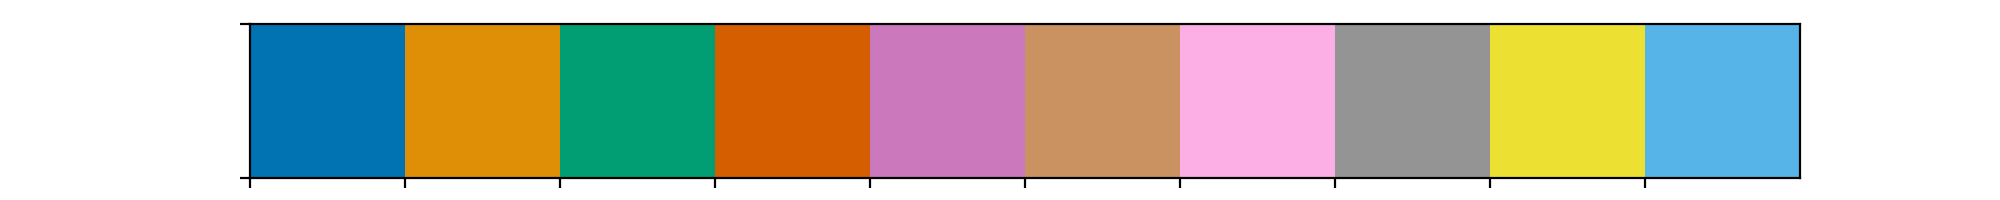

In [2]:
import numpy as np

import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.io import fits
from modspectra.cube import TiltedDisk


import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

from astropy.table import Table



pal = sns.color_palette('colorblind')

# sns.set(color_codes=True)
# sns.axes_style("white")
# sns.set_style('whitegrid')

sns.palplot(pal)


# Read in Milky Way Data for BPT Diagram

In [3]:
bpt_data = Table.read("WHAM_BPT_DATA_021119.fits")
nii_ha_data = Table.read("WHAM_NII_HA_DATA_021219.fits")
# bpt_unknown = Table.read("BPT_DATA_MW_UPPER.fits")
# bpt_nohi = Table.read("NOHI_BPT_DATA.fits")

The Data is stored in a fits table as log_10 of the line ratios. The relevant ones for the NII BPT diagram are

    log_nii_ha
    log_oiii_hb
 
Estimates of errors are given as upper and lower values that correspond to plus/minus 1 sigma
They are separate entries for the upper and lower values because the errors are evenly spaced 
when not in log space. 

The table also stores the Galactic Longitude and Latitude coordinate of the 1 degree WHAM beam

    GLON
    GLAT

and the mean x,y,z galactocentric coordinates associated with the emission as informed by the 
Tilted Disk Model of [Liszt & Burton (1982)](http://adsabs.harvard.edu/abs/1980ApJ...236..779L) / our recent update (Krishnarao, Benjamin, & Haffner 2019)

    Galcen_x
    Galcen_y
    Galcen_z


In [4]:
t = Table.read("LINE_RATIO_DATA.fits")


In [5]:
t["NII_SIGMA_LEVEL"] == nii_ha_data["NII_SIGMA_LEVEL"][-3]

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [6]:
t[9]

GAL-LON,GAL-LAT,Galcen_x [3],Galcen_y [3],Galcen_z [3],Vrange [2],HA,HA_ERR,HA_SIGMA_LEVEL,HB,HB_ERR,HB_SIGMA_LEVEL,NII,NII_ERR,NII_SIGMA_LEVEL,SII,SII_ERR,SII_SIGMA_LEVEL,OIII,OIII_ERR,OIII_SIGMA_LEVEL,NII_HA,NII_HA_ERR,SII_HA,SII_HA_ERR,OIII_HB,OIII_HB_ERR
deg,deg,kpc,kpc,kpc,km / s,R,R,,R,R,,R,R,,R,R,,R,R,,erg,erg,erg,erg,erg,erg
float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1.468392,-4.2403574,-0.5552063562368321 .. -0.42516321965988324,0.1623804267383479 .. 0.24293276731332364,-0.6195626300179273 .. -0.5406237262111063,-110.0 .. -50.0,0.7435383,0.22519296,3.301783,0.27734444,0.1445767,1.9183204,0.8280928,0.18076436,4.5810623,0.45367736,0.164146,2.7638648,0.2817644,0.11417928,2.4677365,1.1171471,0.41706967,0.62440336,0.29462066,1.0463858,0.69089484


## Additional Milky Way Data

Some additional data points have been added on from previous observations towards
the Scutum Star Cloud [(Madsen & Reynolds 2005)](http://adsabs.harvard.edu/abs/2005ApJ...630..925M). 

This table similarly has similar data, but not in log_10 space. 
Errors are also not available for this data. 

Note: the oiii line is very weak in this direction, and most of the points from this 
table are cut out of the BPT diagram from the usual ylims I set.

GalactoCentric distances are listed in this table based on kinematic distances using 
a flat rotation curve of 220 km/s. 

    R_G_kinematic

In [7]:
scutum_data = Table.read("MadsenScutumRatios.fits")

## Coordinate Information

Coordinate information can be transformed from the provided galactocentric frame to tilted disk frame as follows:

In [8]:
# Set coordinates 
# 50th percentile
c_galcen = SkyCoord(x = bpt_data["Galcen_x"][:,1], 
                    y = bpt_data["Galcen_y"][:,1], 
                    z = bpt_data["Galcen_z"][:,1], 
                    unit = u.kpc, 
                    frame = 'galactocentric', 
                    galcen_distance = 8.127 * u.kpc )
# 84th percentile
c_galcen_84 = SkyCoord(x = bpt_data["Galcen_x"][:,2], 
                    y = bpt_data["Galcen_y"][:,2], 
                    z = bpt_data["Galcen_z"][:,2], 
                    unit = u.kpc, 
                    frame = 'galactocentric', 
                    galcen_distance = 8.127 * u.kpc )
#16th percentile
c_galcen_16 = SkyCoord(x = bpt_data["Galcen_x"][:,0], 
                    y = bpt_data["Galcen_y"][:,0], 
                    z = bpt_data["Galcen_z"][:,0], 
                    unit = u.kpc, 
                    frame = 'galactocentric', 
                    galcen_distance = 8.127 * u.kpc )

# Set coordinates for data without y-axis data
# Used for Figure 3 in Main Text
nh_c_galcen = SkyCoord(x = nii_ha_data["Galcen_x"][:,1], 
                       y = nii_ha_data["Galcen_y"][:,1], 
                       z = nii_ha_data["Galcen_z"][:,1], 
                       unit = u.kpc, 
                       frame = 'galactocentric', 
                       galcen_distance = 8.127 * u.kpc )
#84th percentile
nh_c_galcen_84 = SkyCoord(x = nii_ha_data["Galcen_x"][:,2], 
                       y = nii_ha_data["Galcen_y"][:,2], 
                       z = nii_ha_data["Galcen_z"][:,2], 
                       unit = u.kpc, 
                       frame = 'galactocentric', 
                       galcen_distance = 8.127 * u.kpc )
# 16th percentile
nh_c_galcen_16 = SkyCoord(x = nii_ha_data["Galcen_x"][:,0], 
                       y = nii_ha_data["Galcen_y"][:,0], 
                       z = nii_ha_data["Galcen_z"][:,0], 
                       unit = u.kpc, 
                       frame = 'galactocentric', 
                       galcen_distance = 8.127 * u.kpc )

# Calculate Galcen R_G
galcen_r = np.sqrt(c_galcen.x**2+c_galcen.y**2)
galcen_r_16 = np.sqrt(c_galcen_16.x**2+c_galcen_16.y**2)
galcen_r_84 = np.sqrt(c_galcen_84.x**2+c_galcen_84.y**2)

# data without y-axis data
nh_galcen_r = np.sqrt(nh_c_galcen.x**2 + nh_c_galcen.y**2)
nh_galcen_r_16 = np.sqrt(nh_c_galcen_16.x**2 + nh_c_galcen_16.y**2)
nh_galcen_r_84 = np.sqrt(nh_c_galcen_84.x**2 + nh_c_galcen_84.y**2)

# Tilted Disk Coordinate Frame
c_tilted = c_galcen.transform_to(TiltedDisk(alpha = 13.5 * u.deg, beta = 20*u.deg, theta = 48.5 *u.deg))

# Construct BPT Diagram

## SDSS DR7 Data

In [9]:
with fits.open('http://wwwmpa.mpa-garching.mpg.de/SDSS/DR7/Data/gal_line_dr7_v5_2.fit.gz') as sdss_data:
    head      = sdss_data[1].data
    Hbeta  = sdss_data[1].data['H_BETA_FLUX']          # Reading the column with Hbeta line 
    OIII   = sdss_data[1].data['OIII_5007_FLUX']       # Reading the column with OIII line
    Halpha = sdss_data[1].data['H_ALPHA_FLUX']         # Reading the column with Halpha line
    NII    = sdss_data[1].data['NII_6584_FLUX']        # Reading the column with NII line

In [10]:
xx     = np.log10(  NII / Halpha )      # log10(NII/Halpha)
yy     = np.log10( OIII /  Hbeta )      # log10(OIII/Hbeta)

/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/anaconda3/envs/mw/lib/python

# Figure 2

<IPython.core.display.Javascript object>


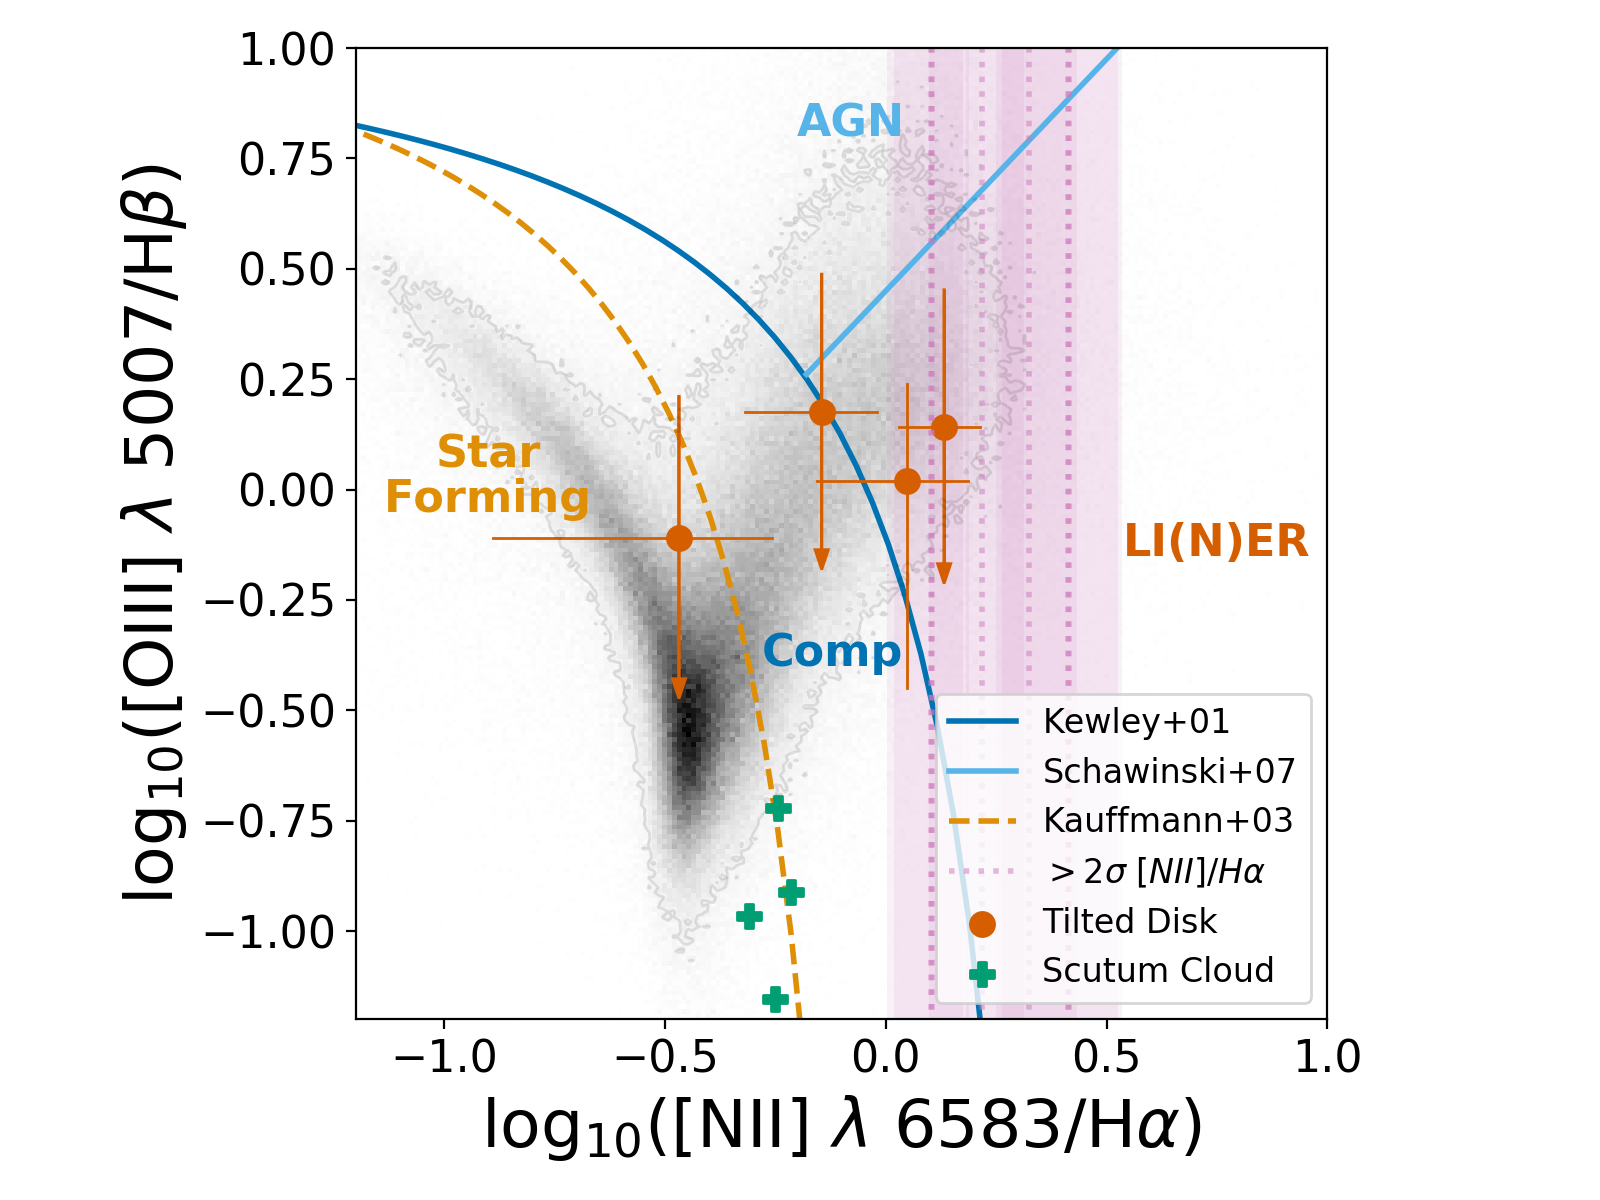

/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: The following kwargs were not used by contour: 'smooth'
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log10
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [11]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
cmap = sns.light_palette(pal[3],as_cmap = True)
cmap2 = sns.light_palette(pal[4],as_cmap = True)


bins_X, bins_Y     =  200., 200.   # Define the number of bins in X- and Y- axis
Xmin, Xmax         = -1.2, 1.0   # Define the maximum and minimum limit in X-axis
Ymin, Ymax         = -1.2, 1.0   # Define the maximum and minimum limit in Y-axis
Nlevels            = 3          # Define the number of levels of isocontour


hist,xedges,yedges = np.histogram2d(xx,yy,bins=(bins_X, bins_Y),range=[[Xmin,Xmax],[Ymin,Ymax]])
masked             = np.ma.masked_where(hist==0, hist)
plotting           = ax.imshow(masked.T,extent=[Xmin, Xmax, Ymin, Ymax],
                               interpolation='nearest',origin='lower',cmap=plt.cm.gray_r)
levels             = np.linspace(0., np.log10(masked.max()), Nlevels)[1:]
CS                 = ax.contour(np.log10(masked.T), levels, colors='k',
                                linewidths=1,extent=[Xmin,Xmax,Ymin,Ymax], alpha = 0.1, smooth = 5)

# sns.kdeplot(xx, yy, levels = 75, cmap = "Greys", alpha = 0.5, ax = ax, 
#             shade = True, shade_lowest = False)




# Kewley+01 ------------------------------------------
X = np.linspace(-1.5,0.3)
Y = (0.61/( X  - 0.47  )) + 1.19

# Schawinski+07 --------------------------------------
X3 = np.linspace(-0.180,1.5)
Y3 = 1.05*X3 + 0.45

# Kauffmann+03 ---------------------------------------
Xk = np.linspace(-1.5,0.)
Yk = 0.61/(Xk -0.05) + 1.3

# Regions --------------------------------------------
ax.plot(X,   Y, '-' , color=pal[0], lw=2, zorder = 1, 
        label='Kewley+01'    ) # Kewley+01
ax.plot(X3, Y3, '-', color=pal[-1], lw=2, zorder = 1, 
        label='Schawinski+07') # Schawinski+07
ax.plot(Xk, Yk, '--', color=pal[1], lw=2, zorder = 1, 
        label='Kauffmann+03' ) # Kauffmann+03

# Axi name here ...
Nsize = 16

# Labels
ax.text(-0.9, 0.05, 'Star', fontsize = Nsize, 
        color = pal[1], horizontalalignment='center', fontweight = "semibold")
ax.text(-0.9, -0.05, 'Forming', fontsize = Nsize, 
        color = pal[1], horizontalalignment='center', fontweight = "semibold")

ax.text(-0.12, -0.4, 'Comp', fontsize = Nsize, 
        color = pal[0], horizontalalignment='center', fontweight = "semibold")

ax.text(-0.08, 0.8, 'AGN', fontsize = Nsize, 
        color = pal[-1], horizontalalignment='center', fontweight = "semibold")

ax.text(0.75, -0.15, 'LI(N)ER', fontsize = Nsize, 
        color = pal[3], horizontalalignment='center', fontweight = "semibold")

ax.set_xlabel(r'$\log_{10}$([NII] $\lambda$ 6583/H$\alpha$)',fontsize=Nsize*1.5)
ax.set_ylabel(r'$\log_{10}$([OIII] $\lambda$ 5007/H$\beta$)',fontsize=Nsize*1.5)
ax.tick_params(labelsize = Nsize)
ax.set_ylim(Ymin, Ymax)
ax.set_xlim(Xmin, Xmax)

# MW Errors
for ell in range(len(bpt_data["log_nii_ha"])):
    ax.plot([bpt_data["log_nii_ha_lower"][ell], bpt_data["log_nii_ha_upper"][ell]], 
            [bpt_data["log_oiii_hb"][ell], bpt_data["log_oiii_hb"][ell]], 
            c = pal[3], lw = 1, zorder = 1)
    y_axis_errs = [bpt_data["log_oiii_hb_upper"][ell], bpt_data["log_oiii_hb_lower"][ell]]
    if np.isnan(y_axis_errs[1]):
        position = [bpt_data["log_nii_ha"][ell], bpt_data["log_oiii_hb_upper"][ell], 
                   0., 
                    -2 * (bpt_data["log_oiii_hb_upper"][ell] - bpt_data["log_oiii_hb"][ell])]
        ax.arrow(position[0], position[1], position[2], position[3],
                color = pal[3], width = .001, zorder = 1, head_width = .03)
    else:
        ax.plot([bpt_data["log_nii_ha"][ell], bpt_data["log_nii_ha"][ell]], 
                [bpt_data["log_oiii_hb_upper"][ell], bpt_data["log_oiii_hb_lower"][ell]], 
                c = pal[3], lw = 1, zorder = 1)
    

# MW Points
mws = ax.scatter(bpt_data["log_nii_ha"], bpt_data["log_oiii_hb"], s = 75, 
           color = pal[3] , vmin = -0.4, vmax = -0.1, label = 'Tilted Disk', zorder = 2)

# Madsen Points

mads = ax.scatter(np.log10(scutum_data["nii_ha"]), np.log10(scutum_data["oiii_hb"]), 
                  s = 75, c = pal[2], 
                    vmin = 4, vmax = 6.5, zorder = 2, marker = 'P', 
                  label = 'Scutum Cloud')

# # Unknown Points

# uk = ax.scatter(bpt_unknown["log_nii_ha"], bpt_unknown["log_oiii_hb"], s = 75, c = pal[2],
#             vmin = -0.4, vmax = -0.1, label = 'Upper Feature (HI)', zorder = 2, marker = 's')

# # Unknown Errors
# for ell in range(len(bpt_unknown["log_nii_ha"])):
#     ax.plot([bpt_unknown["log_nii_ha_lower"][ell], bpt_unknown["log_nii_ha_upper"][ell]], 
#             [bpt_unknown["log_oiii_hb"][ell], bpt_unknown["log_oiii_hb"][ell]], 
#             c = pal[2], lw = 1, zorder = 1)
    
#     ax.plot([bpt_unknown["log_nii_ha"][ell], bpt_unknown["log_nii_ha"][ell]], 
#                 [bpt_unknown["log_oiii_hb_upper"][ell], bpt_unknown["log_oiii_hb_lower"][ell]], 
#                 c = pal[2], lw = 1, zorder = 1)
    
# # NoHI Points

# nh = ax.scatter(bpt_nohi["log_nii_ha"], bpt_nohi["log_oiii_hb"], s = 75, c = pal[2],
#             vmin = -0.4, vmax = -0.1, label = 'Upper Feature (No HI)', zorder = 2, marker = '*')

# # NoHI Errors
# for ell in range(len(bpt_nohi["log_nii_ha"])):
#     ax.plot([bpt_nohi["log_nii_ha_lower"][ell], bpt_nohi["log_nii_ha_upper"][ell]], 
#             [bpt_nohi["log_oiii_hb"][ell], bpt_nohi["log_oiii_hb"][ell]], 
#             c = pal[2], lw = 1, zorder = 1)
    
#     ax.plot([bpt_nohi["log_nii_ha"][ell], bpt_nohi["log_nii_ha"][ell]], 
#                 [bpt_nohi["log_oiii_hb_upper"][ell], bpt_nohi["log_oiii_hb_lower"][ell]], 
#                 c = pal[2], lw = 1, zorder = 1)
        
        


# x_axis_only_points
for ell in range(9):
    if ell not in [0,6,7]:
        if ell == 1:
            ax.plot([nii_ha_data["log_nii_ha"][ell], nii_ha_data["log_nii_ha"][ell]], [-2-ell/3.,2], 
                ':', lw = 2, c = pal[4], alpha = .5, label = r'$>2\sigma$ $[NII]/H\alpha$')
        else: 
            ax.plot([nii_ha_data["log_nii_ha"][ell], nii_ha_data["log_nii_ha"][ell]], [-2-ell/3.,2], 
                ':', lw = 2, c = pal[4], alpha = .5)
        ax.fill_betweenx([-2,2], 
                         [nii_ha_data["log_nii_ha_lower"][ell], nii_ha_data["log_nii_ha_lower"][ell]], 
                         x2 = [nii_ha_data["log_nii_ha_upper"][ell], nii_ha_data["log_nii_ha_upper"][ell]], 
                         facecolor = pal[4], alpha = .1, zorder = 1)




ax.legend(loc = 4, fontsize = 12)
leg = ax.get_legend()
leg.legendHandles[4].set_color(pal[3])
leg.legendHandles[5].set_color(pal[2])

plt.tight_layout()

# plt.savefig("/Users/dk/Desktop/BPT_smooth.svg", transparent = True)
plt.savefig("/Users/dk/Desktop/BPT_smooth.png", dpi = 300)

# Figure 3

In [ ]:
plt.figure()
plt.scatter(nh_galcen_r[:-1], nii_ha_data["log_nii_ha"][:-1], zorder = 1, c = pal[2], 
            label = r"$>2\sigma$ Detection", s = 75, marker = "x")
plt.scatter(nh_galcen_r[-1].value+.01, nii_ha_data["log_nii_ha"][-1]+0.01, zorder = 1, c = pal[2], 
            s = 50, marker = "x")
plt.scatter(galcen_r[3], bpt_data["log_nii_ha"][3], zorder = 1, c = pal[0], 
            label = r"$1.3 \sigma$ Detection", s = 50, marker = "o")
plt.plot([galcen_r_16[3].value, galcen_r_84[3].value], 
             [bpt_data["log_nii_ha"][3], bpt_data["log_nii_ha"][3]], 
             c = pal[3], zorder = 0)
plt.plot([galcen_r[3].value, galcen_r[3].value], 
             [bpt_data["log_nii_ha_lower"][3], bpt_data["log_nii_ha_upper"][3]], 
             c = pal[3], zorder = 0, label = r"$[OIII]$ and $H\beta$ Detected")

for ell in range(9):
    if ell in [0,6,7]:
        c = pal[3]
    else:
        c = pal[4]
        
    if ell == 8:
        plt.plot([nh_galcen_r_16[ell].value+.01, nh_galcen_r_84[ell].value+.01], 
             [nii_ha_data["log_nii_ha"][ell]+.01, nii_ha_data["log_nii_ha"][ell]+.01], 
             c = c, zorder = 0)
        plt.plot([nh_galcen_r[ell].value+.01, nh_galcen_r[ell].value+.01], 
             [nii_ha_data["log_nii_ha_lower"][ell]+.01, nii_ha_data["log_nii_ha_upper"][ell]+.01], 
             c = c, zorder = 0)
    else:
        plt.plot([nh_galcen_r_16[ell].value, nh_galcen_r_84[ell].value], 
                 [nii_ha_data["log_nii_ha"][ell], nii_ha_data["log_nii_ha"][ell]], 
                 c = c, zorder = 0)
    if ell == 1:
        plt.plot([nh_galcen_r[ell].value, nh_galcen_r[ell].value], 
             [nii_ha_data["log_nii_ha_lower"][ell], nii_ha_data["log_nii_ha_upper"][ell]], 
             c = c, zorder = 0, label = r"$[OIII]$ or $H\beta$ Not Detected")
    else:
        plt.plot([nh_galcen_r[ell].value, nh_galcen_r[ell].value], 
             [nii_ha_data["log_nii_ha_lower"][ell], nii_ha_data["log_nii_ha_upper"][ell]], 
             c = c, zorder = 0)
    
plt.xlabel(r"$R_G$ (kpc)")
plt.ylabel(r"$log_{10} [NII]/H\alpha$")

leg = plt.legend(loc = 4)

# plt.savefig("Figure3.png", dpi = 300, transparent = True)
# plt.savefig("Figure3.svg", transparent = True)

In [ ]:
nii_ha_data["log_nii_ha"][-1].value+0.02

In [ ]:
nii_ha_data

In [8]:
from matplotlib.gridspec import GridSpec

<IPython.core.display.Javascript object>


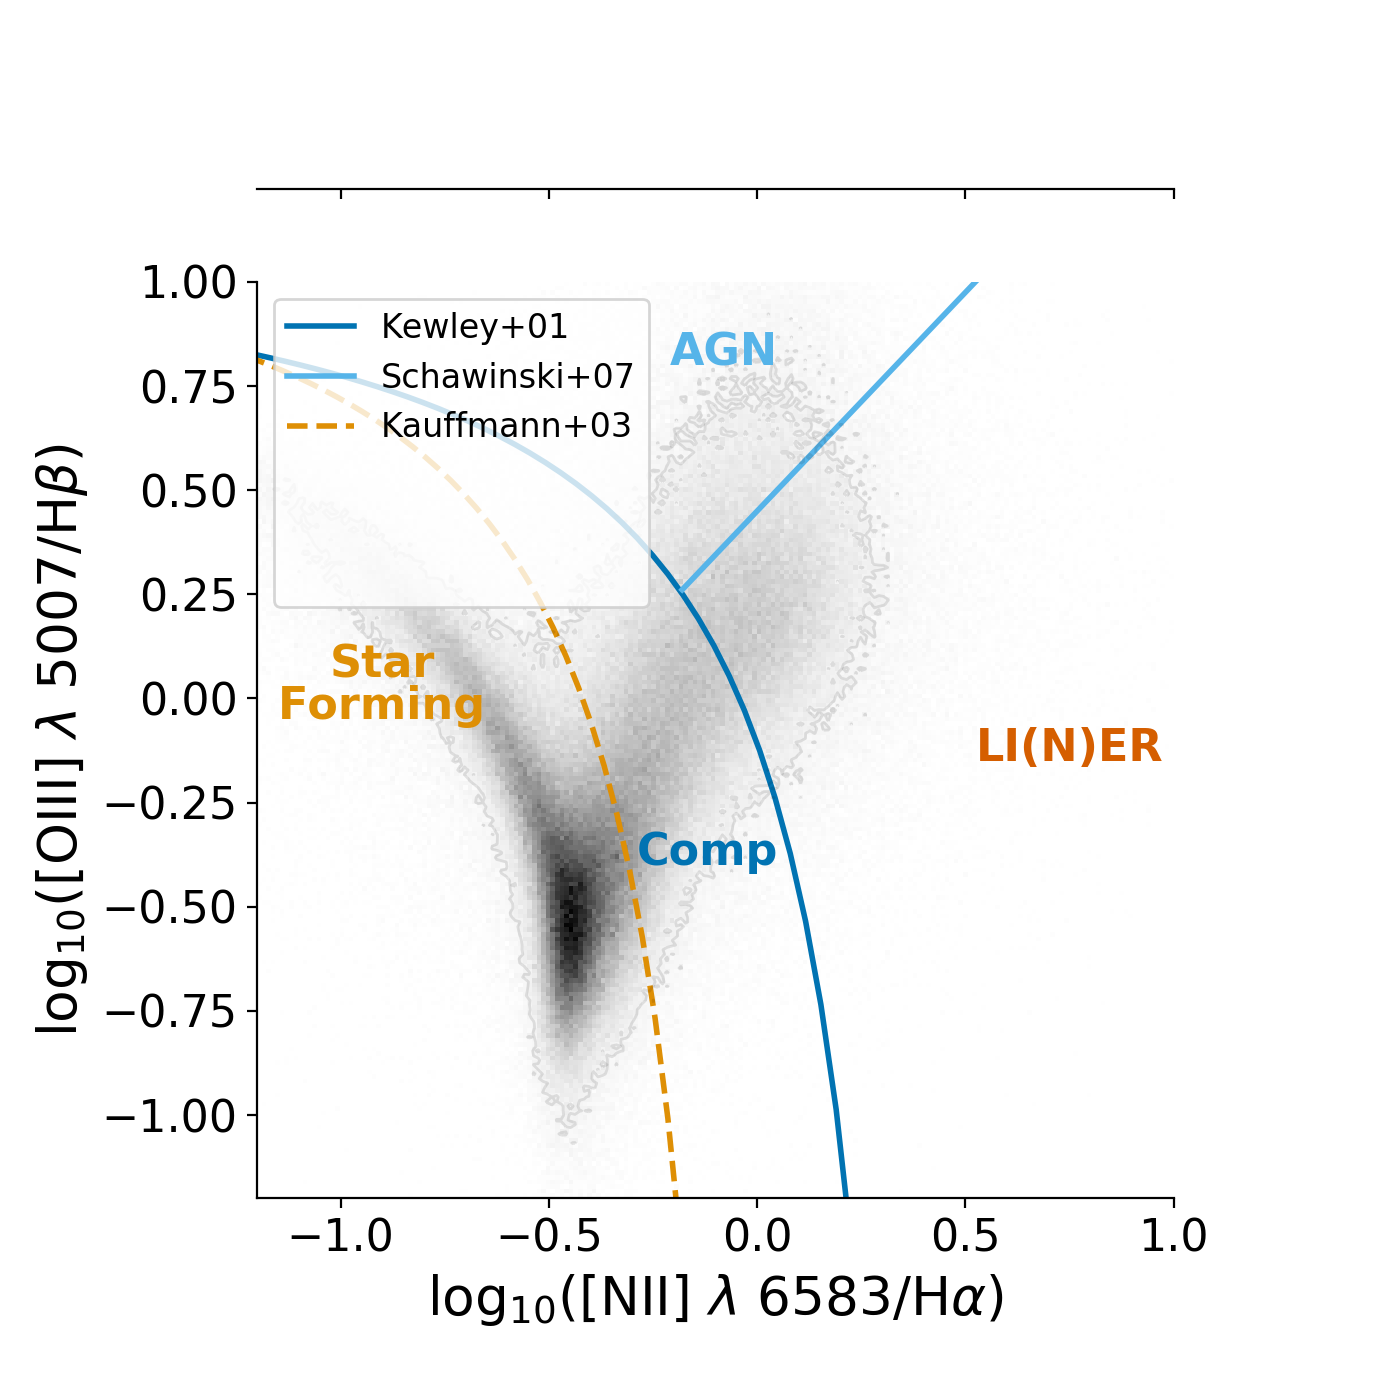

/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: The following kwargs were not used by contour: 'smooth'
/anaconda3/envs/mw/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: divide by zero encountered in log10
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [90]:
g = sns.jointplot(bpt_data["log_nii_ha"], bpt_data["log_oiii_hb"], 
                  alpha = 0, marginal_kws = {"color":"w"}, height = 7)

ax = g.ax_joint
ax_t = g.ax_marg_x
ax_r = g.ax_marg_y


cmap = sns.light_palette(pal[3],as_cmap = True)
cmap2 = sns.light_palette(pal[4],as_cmap = True)


bins_X, bins_Y     =  200., 200.   # Define the number of bins in X- and Y- axis
Xmin, Xmax         = -1.2, 1.0   # Define the maximum and minimum limit in X-axis
Ymin, Ymax         = -1.2, 1.0   # Define the maximum and minimum limit in Y-axis
Nlevels            = 3          # Define the number of levels of isocontour


hist,xedges,yedges = np.histogram2d(xx,yy,bins=(bins_X, bins_Y),range=[[Xmin,Xmax],[Ymin,Ymax]])
masked             = np.ma.masked_where(hist==0, hist)
plotting           = ax.imshow(masked.T,extent=[Xmin, Xmax, Ymin, Ymax],
                               interpolation='nearest',origin='lower',cmap=plt.cm.gray_r)
levels             = np.linspace(0., np.log10(masked.max()), Nlevels)[1:]
CS                 = ax.contour(np.log10(masked.T), levels, colors='k',
                                linewidths=1,extent=[Xmin,Xmax,Ymin,Ymax], alpha = 0.1, smooth = 5)




# Kewley+01 ------------------------------------------
X = np.linspace(-1.5,0.3)
Y = (0.61/( X  - 0.47  )) + 1.19

# Schawinski+07 --------------------------------------
X3 = np.linspace(-0.180,1.5)
Y3 = 1.05*X3 + 0.45

# Kauffmann+03 ---------------------------------------
Xk = np.linspace(-1.5,0.)
Yk = 0.61/(Xk -0.05) + 1.3

# Regions --------------------------------------------
ax.plot(X,   Y, '-' , color=pal[0], lw=2, zorder = 1, 
        label='Kewley+01'    ) # Kewley+01
ax.plot(X3, Y3, '-', color=pal[-1], lw=2, zorder = 1, 
        label='Schawinski+07') # Schawinski+07
ax.plot(Xk, Yk, '--', color=pal[1], lw=2, zorder = 1, 
        label='Kauffmann+03' ) # Kauffmann+03

# Axi name here ...
Nsize = 16

# Labels
ax.text(-0.9, 0.05, 'Star', fontsize = Nsize, 
        color = pal[1], horizontalalignment='center', fontweight = "semibold")
ax.text(-0.9, -0.05, 'Forming', fontsize = Nsize, 
        color = pal[1], horizontalalignment='center', fontweight = "semibold")

ax.text(-0.12, -0.4, 'Comp', fontsize = Nsize, 
        color = pal[0], horizontalalignment='center', fontweight = "semibold")

ax.text(-0.08, 0.8, 'AGN', fontsize = Nsize, 
        color = pal[-1], horizontalalignment='center', fontweight = "semibold")

ax.text(0.75, -0.15, 'LI(N)ER', fontsize = Nsize, 
        color = pal[3], horizontalalignment='center', fontweight = "semibold")

ax.set_xlabel(r'$\log_{10}$([NII] $\lambda$ 6583/H$\alpha$)',fontsize=Nsize*1.2)
ax.set_ylabel(r'$\log_{10}$([OIII] $\lambda$ 5007/H$\beta$)',fontsize=Nsize*1.2)
ax.tick_params(labelsize = Nsize)
ax.set_ylim(Ymin, Ymax)
ax.set_xlim(Xmin, Xmax)

# MW Errors
# for ell in range(len(bpt_data["log_nii_ha"])):
#     if ell in [0,1,2,3]:
#         ax.plot([bpt_data["log_nii_ha_lower"][ell], bpt_data["log_nii_ha_upper"][ell]], 
#                 [bpt_data["log_oiii_hb"][ell], bpt_data["log_oiii_hb"][ell]], 
#                 c = pal[3], lw = 1, zorder = 1)
#         y_axis_errs = [bpt_data["log_oiii_hb_upper"][ell], bpt_data["log_oiii_hb_lower"][ell]]
#         if np.isnan(y_axis_errs[1]):
#             position = [bpt_data["log_nii_ha"][ell], bpt_data["log_oiii_hb_upper"][ell], 
#                        0., 
#                         -2 * (bpt_data["log_oiii_hb_upper"][ell] - bpt_data["log_oiii_hb"][ell])]
#             ax.arrow(position[0], position[1], position[2], position[3],
#                     color = pal[3], width = .001, zorder = 1, head_width = .03)
#         else:
#             ax.plot([bpt_data["log_nii_ha"][ell], bpt_data["log_nii_ha"][ell]], 
#                     [bpt_data["log_oiii_hb_upper"][ell], bpt_data["log_oiii_hb_lower"][ell]], 
#                     c = pal[3], lw = 1, zorder = 1)
    

# MW Points
mws = ax.scatter(bpt_data["log_nii_ha"][[0,1,2,3]], bpt_data["log_oiii_hb"][[0,1,2,3]], s = 0, 
           color = pal[3] , vmin = -0.4, vmax = -0.1, label = ' ', zorder = 2)

# Madsen Points

mads = ax.scatter(np.log10(scutum_data["nii_ha"]), np.log10(scutum_data["oiii_hb"]), 
                  s = 0, c = pal[2], 
                    vmin = 4, vmax = 6.5, zorder = 2, marker = 'P', 
                  label = ' ')



# x_axis_only_points
for ell in range(9):
    if ell not in [0,6,7]:
        if ell == 1:
            ax.plot([nii_ha_data["log_nii_ha"][ell], nii_ha_data["log_nii_ha"][ell]], [-2-ell/3.,2], 
                ':', lw = 0, c = pal[4], alpha = .5, label = r' ')
        else: 
            ax.plot([nii_ha_data["log_nii_ha"][ell], nii_ha_data["log_nii_ha"][ell]], [-2-ell/3.,2], 
                ':', lw = 0, c = pal[4], alpha = .5)
#         ax.fill_betweenx([-2,2], 
#                          [nii_ha_data["log_nii_ha_lower"][ell], nii_ha_data["log_nii_ha_lower"][ell]], 
#                          x2 = [nii_ha_data["log_nii_ha_upper"][ell], nii_ha_data["log_nii_ha_upper"][ell]], 
#                          facecolor = pal[4], alpha = .1, zorder = 1)




ax.legend(loc = 2, fontsize = 12)
leg = ax.get_legend()
leg.legendHandles[4].set_color(pal[3])
leg.legendHandles[5].set_color(pal[2])


# sns.distplot(bpt_data["log_nii_ha"], color = pal[3], 
#              ax = ax_t, kde = False, bins = 10)

mask_nii = np.zeros(9, dtype = bool)
mask_nii[0] = True
mask_nii[6] = True
mask_nii[7] = True

# sns.distplot(nii_ha_data["log_nii_ha"][~mask_nii], color = pal[4], 
#              ax = ax_t, kde = False, bins = 10)

# sns.distplot(np.log10(scutum_data["nii_ha"]), color = pal[2], 
#              ax = ax_t, kde = False, bins = 10)
ax_r.remove()
ax_t.set_xlabel("")

plt.tight_layout()

# plt.savefig("/Users/dk/Desktop/TalkFigs/BPT_Empty.png", dpi = 300, transparent = True)

In [74]:
bpt_data["log_nii_ha"][]

-0.14516135
0.04811036
0.13208179
-0.4684243
